In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
articles = pd.read_csv('../data/processed/articles_headline_group.csv', parse_dates=True)

In [3]:
articles.head()

,Unnamed: 0,Unnamed: 0.1,HEADLINE,HEADLINE_LEN,PUBLISH_DATE,DAY_OF_WEEK,PUBLISH_MONTH,PUBLISHTIMEINSECONDS,WEEKDAY,HOLIDAY,BUREAU,ARTICLE_TYPE,PROMO,CUM_SESSIONS_SOFAR,HEADLINE_GROUP
0,0,0,2 under-the-radar tech stocks to buy in 2022,45,2022-04-12,1,4,22740,Weekday,No,technology-and-telecom,article,These two companies an enjoying explosive top-...,207,7
1,1,1,does it matter that gamestop's split will be a...,63,2022-04-12,1,4,32400,Weekday,No,consumer-goods,article,Just how different is it from a cash dividend?,5811,3
2,2,2,is amazon stock a buy this month?,34,2022-04-12,1,4,38220,Weekday,No,consumer-goods,article,There are strong reasons to invest in Amazon r...,1637,3
3,3,3,2 stocks that cut you a check each month,41,2022-04-12,1,4,33420,Weekday,No,industrials,article,"For some investors, dividend income that flows...",2037,2
4,4,4,is amazon or alphabet the better stock split i...,57,2022-04-12,1,4,62220,Weekday,No,technology-and-telecom,article,Both companies dominate much of our digital li...,7682,3


In [4]:
# set X 
X = articles['PROMO']

In [5]:
# examine X
X

0        These two companies an enjoying explosive top-...
1           Just how different is it from a cash dividend?
2        There are strong reasons to invest in Amazon r...
3        For some investors, dividend income that flows...
4        Both companies dominate much of our digital li...
                               ...                        
24940    The biotech's experimental blood cancer treatm...
24941    These former stock market darlings can be purc...
24942    Lockdowns in China might create a beneficial e...
24943    CrowdStrike's stock has cratered during the te...
24944    Insane home price growth has made iBuying more...
Name: PROMO, Length: 24945, dtype: object

In [6]:
# instantiate count vectorizer
cvect = CountVectorizer(stop_words='english', max_features=150)

In [7]:
# fit on headlinge
Xv = cvect.fit_transform(X)

In [8]:
Xv

<24945x150 sparse matrix of type '<class 'numpy.int64'>'
	with 81469 stored elements in Compressed Sparse Row format>

In [9]:
kmeans = KMeans(n_clusters = 10).fit(Xv)

In [10]:
kmeans.labels_

array([1, 3, 1, ..., 3, 1, 3], dtype=int32)

In [11]:
articles['PROMO_GROUP'] = kmeans.labels_

In [12]:
articles.head()

,Unnamed: 0,Unnamed: 0.1,HEADLINE,HEADLINE_LEN,PUBLISH_DATE,DAY_OF_WEEK,PUBLISH_MONTH,PUBLISHTIMEINSECONDS,WEEKDAY,HOLIDAY,BUREAU,ARTICLE_TYPE,PROMO,CUM_SESSIONS_SOFAR,HEADLINE_GROUP,PROMO_GROUP
0,0,0,2 under-the-radar tech stocks to buy in 2022,45,2022-04-12,1,4,22740,Weekday,No,technology-and-telecom,article,These two companies an enjoying explosive top-...,207,7,1
1,1,1,does it matter that gamestop's split will be a...,63,2022-04-12,1,4,32400,Weekday,No,consumer-goods,article,Just how different is it from a cash dividend?,5811,3,3
2,2,2,is amazon stock a buy this month?,34,2022-04-12,1,4,38220,Weekday,No,consumer-goods,article,There are strong reasons to invest in Amazon r...,1637,3,1
3,3,3,2 stocks that cut you a check each month,41,2022-04-12,1,4,33420,Weekday,No,industrials,article,"For some investors, dividend income that flows...",2037,2,5
4,4,4,is amazon or alphabet the better stock split i...,57,2022-04-12,1,4,62220,Weekday,No,technology-and-telecom,article,Both companies dominate much of our digital li...,7682,3,3


In [13]:
articles['PROMO_GROUP'] .value_counts()

3    13645
0     2113
5     1937
8     1745
1     1605
2     1252
4     1095
9      864
7      438
6      251
Name: PROMO_GROUP, dtype: int64

In [14]:
articles.groupby(['PROMO_GROUP', 'PROMO']).count()

Unnamed: 0  \
PROMO_GROUP PROMO                                                            
0           A earnings call for the period ending July 31, ...           1   
            AA earnings call for the period ending Septembe...           1   
            AAL earnings call for the period ending Septemb...           1   
            AAOI earnings call for the period ending Septem...           1   
            AAON earnings call for the period ending Septem...           1   
...                                                                    ...   
9           You don't want to miss out on these bank stocks...           1   
            You get an eight-year window to sign up for ben...           1   
            You have until April 15 to make an IRA contribu...           1   
            You'll have a much better shot at getting a sho...           1   
            Zendesk is the rare software stock that's posit...           1   

                                                                Unnamed: 0.1  \
PROMO_GROUP PROMO                                                              
0           A earnings call for the period ending July 31, ...             1   
            AA earnings call for the period ending Septembe...             1   
            AAL earnings call for the period ending Septemb...             1   
            AAOI earnings call for the period ending Septem...             1   
            AAON earnings call for the period ending Septem...             1   
...                                                                      ...   
9           You don't want to miss out on these bank stocks...             1   
            You get an eight-year window to sign up for ben...             1   
            You have until April 15 to make an IRA contribu...             1   
            You'll have a much better shot at getting a sho...             1   
            Zendesk is the rare software stock that's posit...             1   

                                                                HEADLINE  \
PROMO_GROUP PROMO                                                          
0           A earnings call for the period ending July 31, ...         1   
            AA earnings call for the period ending Septembe...         1   
            AAL earnings call for the period ending Septemb...         1   
            AAOI earnings call for the period ending Septem...         1   
            AAON earnings call for the period ending Septem...         1   
...                                                                  ...   
9           You don't want to miss out on these bank stocks...         1   
            You get an eight-year window to sign up for ben...         1   
            You have until April 15 to make an IRA contribu...         1   
            You'll have a much better shot at getting a sho...         1   
            Zendesk is the rare software stock that's posit...         1   

                                                                HEADLINE_LEN  \
PROMO_GROUP PROMO                                                              
0           A earnings call for the period ending July 31, ...             1   
            AA earnings call for the period ending Septembe...             1   
            AAL earnings call for the period ending Septemb...             1   
            AAOI earnings call for the period ending Septem...             1   
            AAON earnings call for the period ending Septem...             1   
...                                                                      ...   
9           You don't want to miss out on these bank stocks...             1   
            You get an eight-year window to sign up for ben...             1   
            You have until April 15 to make an IRA contribu...             1   
            You'll have a much better shot at getting a sho...             1   
            Zendesk is the rare software stock that's posit

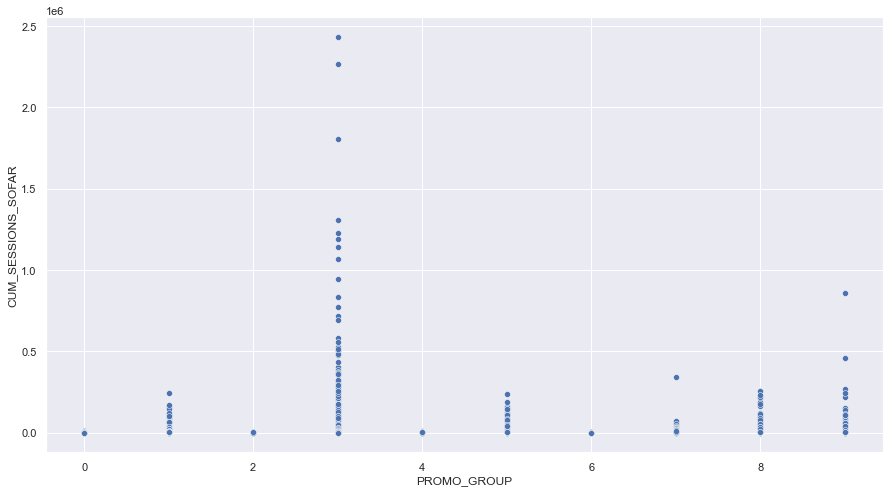

In [15]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(data = articles, x='PROMO_GROUP', y='CUM_SESSIONS_SOFAR' );

- the promo label does seem to have some relationship with the cumulative sessions

In [16]:
articles.head()

,Unnamed: 0,Unnamed: 0.1,HEADLINE,HEADLINE_LEN,PUBLISH_DATE,DAY_OF_WEEK,PUBLISH_MONTH,PUBLISHTIMEINSECONDS,WEEKDAY,HOLIDAY,BUREAU,ARTICLE_TYPE,PROMO,CUM_SESSIONS_SOFAR,HEADLINE_GROUP,PROMO_GROUP
0,0,0,2 under-the-radar tech stocks to buy in 2022,45,2022-04-12,1,4,22740,Weekday,No,technology-and-telecom,article,These two companies an enjoying explosive top-...,207,7,1
1,1,1,does it matter that gamestop's split will be a...,63,2022-04-12,1,4,32400,Weekday,No,consumer-goods,article,Just how different is it from a cash dividend?,5811,3,3
2,2,2,is amazon stock a buy this month?,34,2022-04-12,1,4,38220,Weekday,No,consumer-goods,article,There are strong reasons to invest in Amazon r...,1637,3,1
3,3,3,2 stocks that cut you a check each month,41,2022-04-12,1,4,33420,Weekday,No,industrials,article,"For some investors, dividend income that flows...",2037,2,5
4,4,4,is amazon or alphabet the better stock split i...,57,2022-04-12,1,4,62220,Weekday,No,technology-and-telecom,article,Both companies dominate much of our digital li...,7682,3,3


In [17]:
articles.drop('Unnamed: 0', axis=1, inplace=True)

In [19]:
articles.drop('Unnamed: 0.1', axis=1, inplace=True)

In [22]:
articles.head()

,HEADLINE,HEADLINE_LEN,PUBLISH_DATE,DAY_OF_WEEK,PUBLISH_MONTH,PUBLISHTIMEINSECONDS,WEEKDAY,HOLIDAY,BUREAU,ARTICLE_TYPE,PROMO,CUM_SESSIONS_SOFAR,HEADLINE_GROUP,PROMO_GROUP
0,2 under-the-radar tech stocks to buy in 2022,45,2022-04-12,1,4,22740,Weekday,No,technology-and-telecom,article,These two companies an enjoying explosive top-...,207,7,1
1,does it matter that gamestop's split will be a...,63,2022-04-12,1,4,32400,Weekday,No,consumer-goods,article,Just how different is it from a cash dividend?,5811,3,3
2,is amazon stock a buy this month?,34,2022-04-12,1,4,38220,Weekday,No,consumer-goods,article,There are strong reasons to invest in Amazon r...,1637,3,1
3,2 stocks that cut you a check each month,41,2022-04-12,1,4,33420,Weekday,No,industrials,article,"For some investors, dividend income that flows...",2037,2,5
4,is amazon or alphabet the better stock split i...,57,2022-04-12,1,4,62220,Weekday,No,technology-and-telecom,article,Both companies dominate much of our digital li...,7682,3,3


In [23]:
articles.to_csv('../data/processed/articles_promo_group.csv')